In [8]:
# importing the essentials

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [9]:
# importing the csv into a dataframe using pandas

techSalariesDf = pd.read_csv("/Users/alliborland/Desktop/Visual Studio/FinalProject2302/edited_salaries.csv")

# trimming the data down so only these following locations will show up in the dataframe
selected_locations = ['Seattle, WA', 'San Francisco, CA', 'New York, NY', 'Redmond, WA', 'Mountain View, CA']

techSalariesDf = techSalariesDf[techSalariesDf['location'].isin(selected_locations)]

#printing the dataframe
techSalariesDf

,title,totalyearlycompensation,yearsofexperience,location,experience_category
0,Software Engineer,100000,5.0,"San Francisco, CA",4-6
1,Software Engineer,157000,5.0,"Mountain View, CA",4-6
2,Software Engineer,208000,8.5,"Seattle, WA",7-9
3,Software Engineer,156000,4.0,"Seattle, WA",4-6
4,Software Engineer,120000,3.0,"Redmond, WA",0-3
...,...,...,...,...,...
41225,Software Engineer,170000,2.0,"Seattle, WA",0-3
41226,Software Engineer,327000,10.0,"Seattle, WA",10-19
41227,Software Engineer,237000,2.0,"Redmond, WA",0-3
41228,Software Engineer,220000,14.0,"Seattle, WA",10-19


In [10]:
#using the decision tree regression model

decision_tree = DecisionTreeRegressor(random_state=42)

# having the X value be YOE and y be TYC because we are trying to predict the y values based on X

X = techSalariesDf[['yearsofexperience']]
y = techSalariesDf['totalyearlycompensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# getting the mean squared error to find the average squared difference between the actual total yearly compensation values and the predicted values 
# MSE is a measure of the model's accuracy, lower values of MSE indicate better fit
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error:", mse_tree)

Decision Tree Mean Squared Error: 10488701302.522785


now time to make a prediciton model that is going to be retrained on the same testing data

In [11]:
# the prediction 
y_pred_test = decision_tree.predict(X_test)

print("Predicted Total Yearly Compensation for Testing Data:", y_pred_test)

# it is predicting the value for each row so it is too big to see but we will still build the model

Predicted Total Yearly Compensation for Testing Data: [167940.79409698 301168.85007278 285500.73206442 ... 275925.65947242
 313036.98811096 328750.68493151]


Using decision trees to predict which feature is most important

In [12]:
# finding the feature importance

selected_locations = ['Seattle, WA', 'San Francisco, CA', 'New York, NY', 'Redmond, WA', 'Mountain View, CA']
techSalariesDf = techSalariesDf[techSalariesDf['location'].isin(selected_locations)]

X = techSalariesDf[['yearsofexperience', 'location']]
y = techSalariesDf['totalyearlycompensation']

X = pd.get_dummies(X)

#training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)

#finding the importance of each feature to see how it will affect the prediction model

feature_importance = decision_tree.feature_importances_

for feature, importance in zip(X.columns, feature_importance):
    print(f"Feature Importance ({feature}): {importance}")

Feature Importance (yearsofexperience): 0.817266299663397
Feature Importance (location_Mountain View, CA): 0.04145574453039213
Feature Importance (location_New York, NY): 0.006417962523480105
Feature Importance (location_Redmond, WA): 0.0835123519558164
Feature Importance (location_San Francisco, CA): 0.04374705867437225
Feature Importance (location_Seattle, WA): 0.007600582652542172


These importance scores indicate the relative importance of each feature in predicting the total yearly compensation. In this case, 'yearsofexperience' has the highest importance score, suggesting that it is the most influential feature in predicting total yearly compensation. The importance scores for the location features indicate their relative importance compared to years of experience.

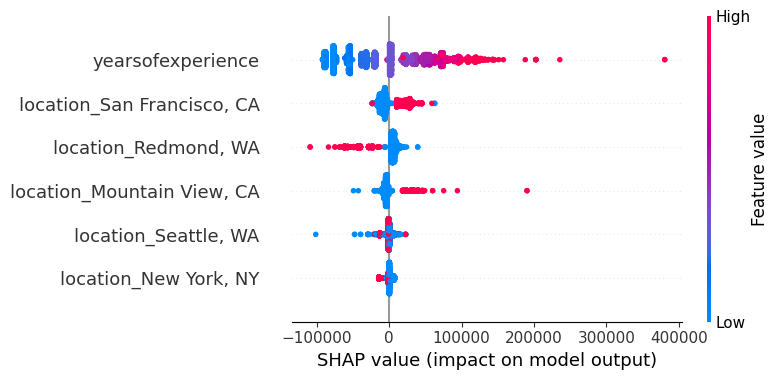

In [13]:
# using SHAP to visual the prediction model

import shap

X_test_encoded = pd.get_dummies(X_test)

explainer = shap.TreeExplainer(decision_tree)

shap_values = explainer.shap_values(X_test_encoded)

shap.summary_plot(shap_values, X_test_encoded)

yearsofexperience has a HIGH impact on the total yearly compensation (aka thats what the faeture value is). The shap value is saying how much that impacted the totalyearlycompensation so it makes since that years of experience and california are high on that list. 

In [1]:
#plotting a partial dependence graph

from sklearn.inspection import plot_partial_dependence

feature_names = X_train.columns.tolist()

plot_partial_dependence(decision_tree, X_train, features=[i for i in range(len(feature_names))], feature_names=feature_names)



ModuleNotFoundError: No module named 'sklearn'

Partial dependence plots show how the prediction of a machine learning model changes as the value of one specific feature varies, while keeping all other features constant. In other words, it helps us understand the relationship between a particular feature and the target variable, while accounting for the effects of other features.

Interpretation: By examining the shape of the line or curve, you can infer the relationship between the chosen feature and the predicted outcome. For example:

Linear Relationship: If the line is straight, it suggests a linear relationship between the feature and the outcome.
Non-linear Relationship: If the line is curved, it indicates a non-linear relationship, and the direction and shape of the curve provide insights into the nature of this relationship.
Directionality: The slope of the line or curve indicates the direction and strength of the relationship. A positive slope suggests that increasing the feature value leads to higher predicted outcomes, while a negative slope suggests the opposite.
Magnitude: The magnitude of the change in the predicted outcome for a unit change in the feature value can also be inferred from the steepness of the line or curve.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


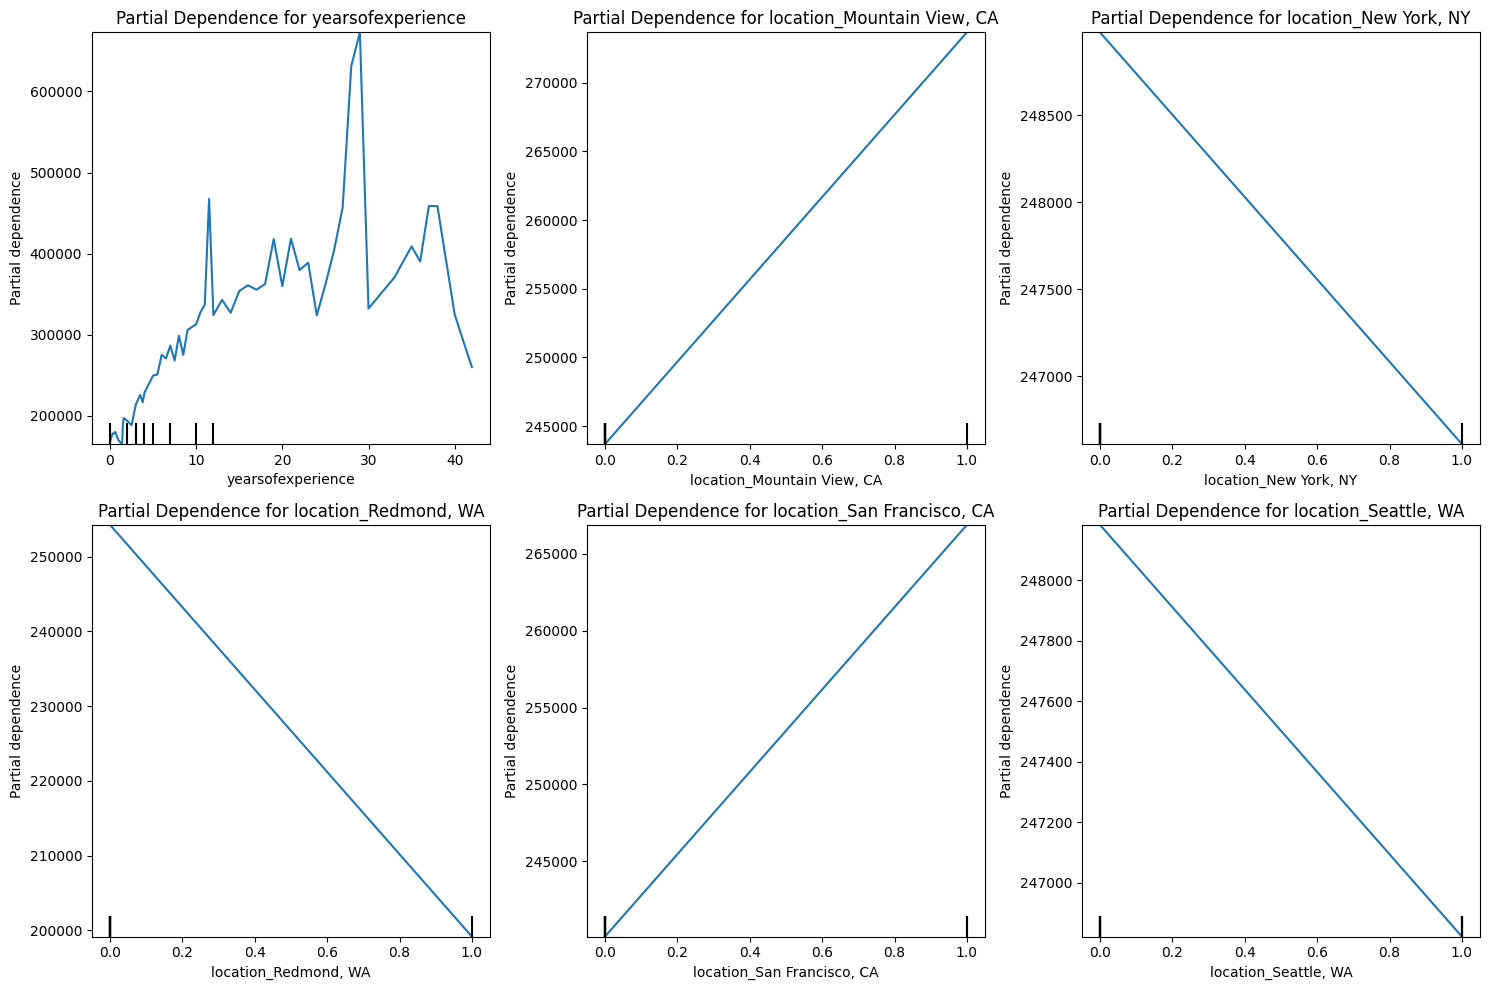

In [ ]:
import matplotlib.pyplot as plt

num_features = len(feature_names)
num_cols = 3 
num_rows = (num_features + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, feature_name in enumerate(feature_names):
    row_idx = i // num_cols  
    col_idx = i % num_cols  
    ax = axes[row_idx, col_idx]  
    plot_partial_dependence(decision_tree, X_train, features=[i], feature_names=feature_names, ax=ax)
    ax.set_title(f'Partial Dependence for {feature_name}')

plt.tight_layout()
plt.show()

When higher numbers of a feature have a lesser impact on the prediction model, it means that increasing the value of that feature doesn't significantly change the model's predictions for the target variable. This observation could be due to several reasons:

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b1639a5-1f60-4e70-b39d-b83cfcee6430' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>